<a href="https://colab.research.google.com/github/9characters/Regression-Performance-Analysis/blob/master/Lattice_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Upload Data and Required python files

#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import os

from display import *
from helper_revised import *

Using TensorFlow backend.


#Importing and Processing Data

In [2]:
columns = ["compound", "ra", "rb", "fe", "bg", "a", "b", "c", "shape"]
inputs = {0:"ra", 1:"rb", 2:"fe", 3:"bg"}
mapping = {0:"a", 1:"b", 2:"c"}

data = pd.read_excel("cubic and orthorhomic.xlsx", sheet_name='cubic')
data.columns = columns

In [3]:
#Separating the dependent and independent variables
X = data.iloc[:, 1:5].dropna().values
y = data.iloc[:, 5:-1].dropna().values

In [4]:
#Standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = scaler.transform(X)

In [5]:
#Dictionaries to store the r2_scores from different regressors
r2_scores = {}
predictions = {}

In [6]:
#Getting the best data combination referring to the Random Forest Algorithm
kf = KFold(n_splits = 16)
r2 = 0

print("Working to get the best data combination!")

for train_index, test_index in kf.split(X):
  X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       y[train_index], y[test_index]

  forest = RandomForestRegressor(max_depth=20) #Tree Pruning to prevent overfitting
  forest.fit(X_train, y_train)
  y_pred = forest.predict(X_test)
  
  result = round(r2_score(y_test, y_pred), 3)
  
  if result >= r2:
    r2 = result
    X_train1, X_test1, y_train1, y_test1 = X_train, X_test, y_train, y_test

print("Achieved the best data combination as reference with Random Forest!")

Working to get the best data combination!
Achieved the best data combination as reference with Random Forest!


In [7]:
X_train, X_test, y_train, y_test = X_train1, X_test1, y_train1, y_test1

#Assigining the regressor and working with it

In [8]:
'''
NOTE:
Random Forest = RF
Decision Tree = DT
Linear Regression = LR
K Nearest Neighbour = KNN
Linear SVR = LSVR
Polynomial SVR = PSVR
RBF Kernel SVR = RBFSVR
'''

'\nNOTE:\nRandom Forest = RF\nDecision Tree = DT\nLinear Regression = LR\nK Nearest Neighbour = KNN\nLinear SVR = LSVR\nPolynomial SVR = PSVR\nRBF Kernel SVR = RBFSVR\n'

In [9]:
#Creating a Plots folder to store the plots
if not os.path.exists("Plots"):
    os.mkdir("Plots")

In [10]:
r_models = ["ANN", "RF", "LR", "DT", "KNN", "LSVR", "PSVR", "RBFSVR"]

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

WORKING FOR ANN MODEL

R2 Score: 0.828
Optimal R2 Score for ANN is 0.828


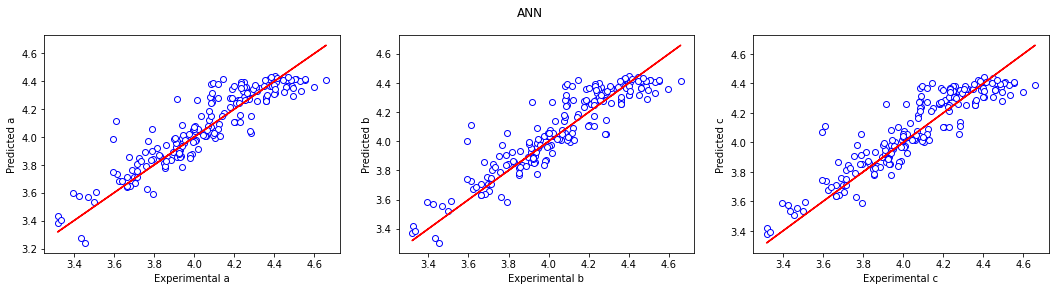

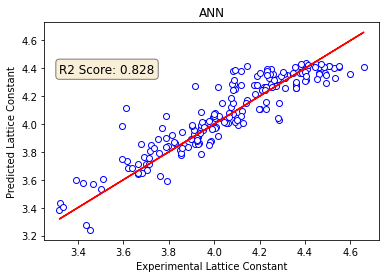


WORKING FOR RANDOM FOREST MODEL
R2 Score: 0.94
Optimal R2 Score for Random Forest is 0.94

Feature Importance:
ra:	0.071
rb:	0.82
fe:	0.101
bg:	0.007


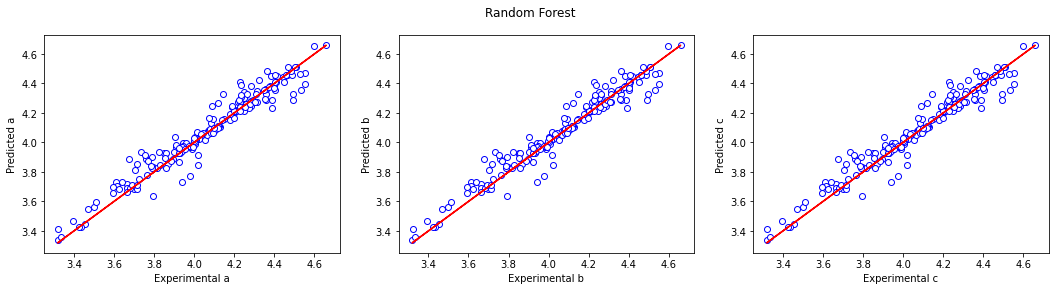

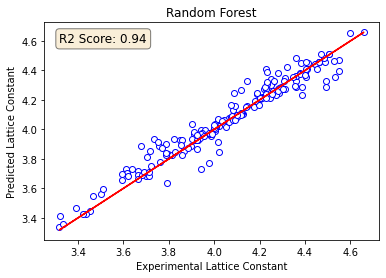


WORKING FOR LINEAR REGRESSION MODEL
R2 Score: 0.716
Optimal R2 Score for Linear Regression is 0.716

Approximated Equations from Linear Model:
a = 0.001ra + 0.05rb + -0.088fe + -0.008bg + 4.388
b = 0.001ra + 0.05rb + -0.088fe + -0.008bg + 4.388
c = 0.001ra + 0.05rb + -0.088fe + -0.008bg + 4.388


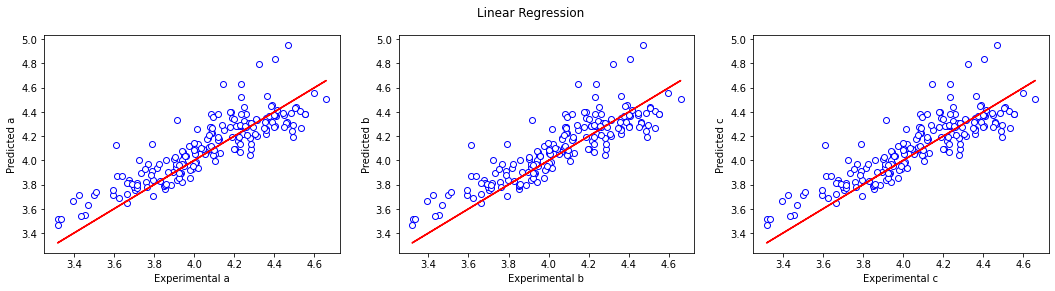

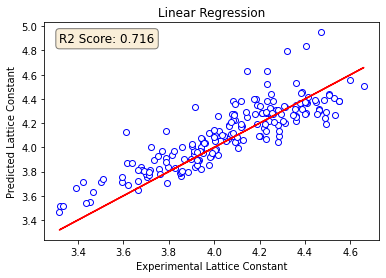


WORKING FOR DECISION TREE MODEL
R2 Score: 0.903
Optimal R2 Score for Decision Tree is 0.903


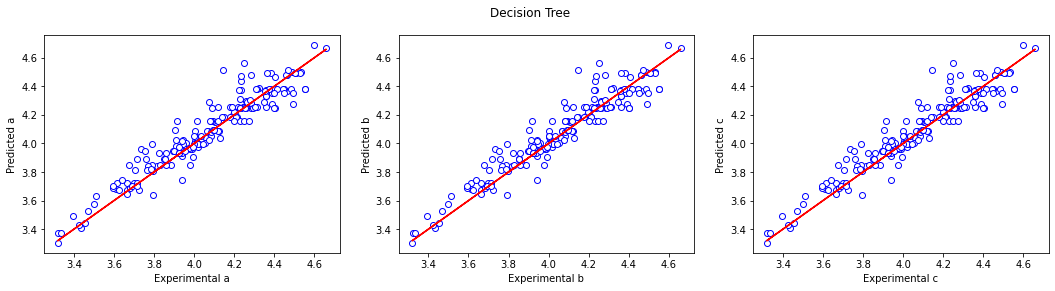

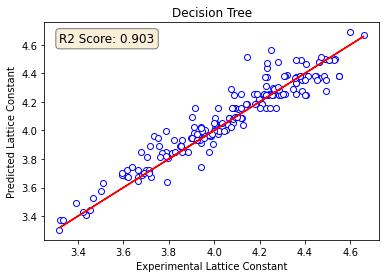


WORKING FOR KNN MODEL
R2 Score: 0.902
Optimal R2 Score for KNN is 0.902


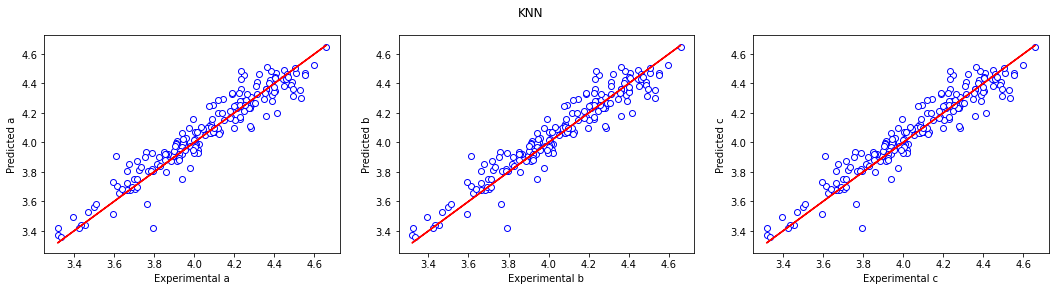

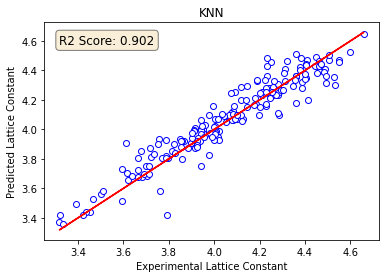


WORKING FOR LINEAR SVR MODEL
R2 Score: 0.696
Optimal R2 Score for Linear SVR is 0.696

Approximated Equations from Linear SVR Model: 
a = 0.001ra + 0.053rb + -0.086fe + -0.009bg + 4.406
b = 0.001ra + 0.053rb + -0.086fe + -0.009bg + 4.406
c = 0.001ra + 0.053rb + -0.086fe + -0.009bg + 4.406


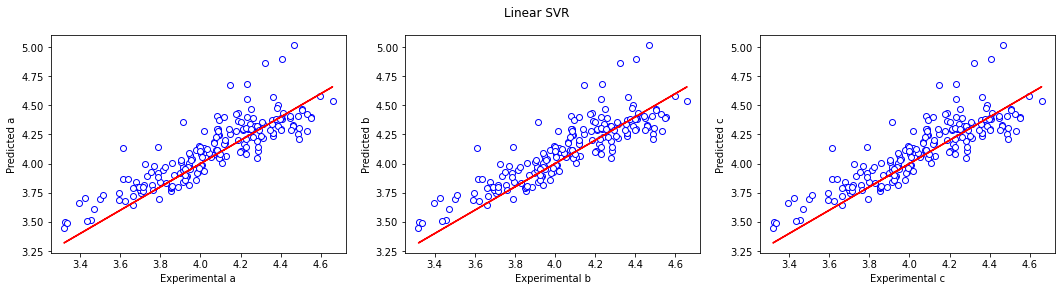

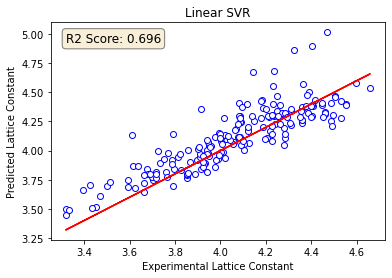


WORKING FOR POLYNOMIAL SVR MODEL
R2 Score: 0.608
Optimal R2 Score for Polynomial SVR is 0.608

Approximated Equations from Polynomial SVR Model: 
a = 1.0ra + 1.0rb + -1.0fe + -1.0bg + 4.243
b = 1.0ra + 1.0rb + -1.0fe + -1.0bg + 4.243
c = 1.0ra + 1.0rb + -1.0fe + -1.0bg + 4.243


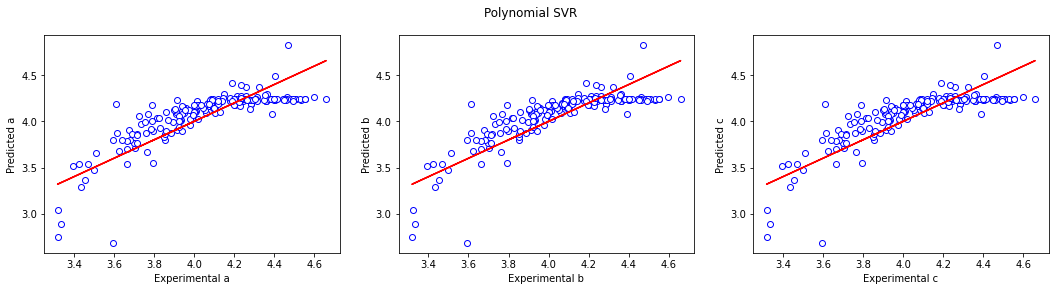

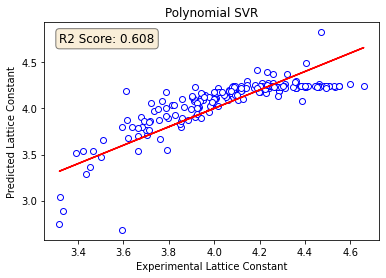


WORKING FOR RBF KERNEL SVR MODEL
R2 Score: 0.835
Optimal R2 Score for RBF Kernel SVR is 0.835

Approximated Equations from RBF Kernel SVR Model: 
a = 1.0ra + 0.393rb + 1.0fe + 1.0bg + 4.071
b = 1.0ra + 0.393rb + 1.0fe + 1.0bg + 4.071
c = 1.0ra + 0.393rb + 1.0fe + 1.0bg + 4.071


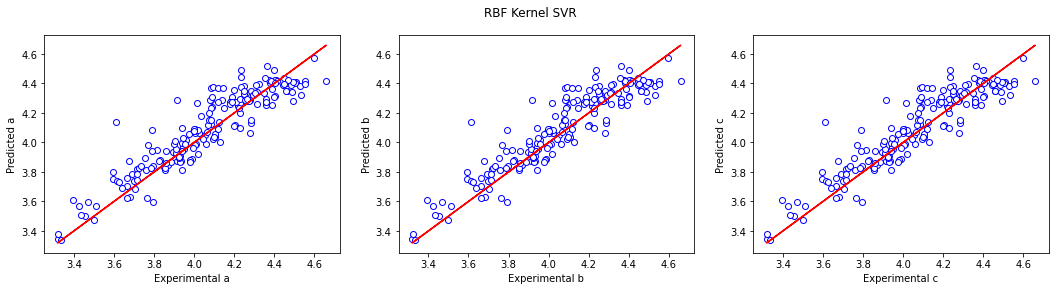

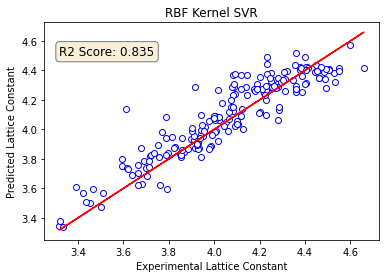

In [11]:
for r_model in r_models:
    #Prompt to get the regression model
    prompt = r_model

    
    y_pred, regressor, model, r2_score, coffs, intercepts = train_data(X_train, X_test, y_train, y_test, prompt)
    print(f"Optimal R2 Score for {regressor} is {r2_score}")

    #Storing the r2_score and predictions in the dictionaries
    r2_scores[regressor] = r2_score
    predictions[regressor] = y_pred

    # Analysis for Random Forest Regressor:
    if prompt == "RF":
        print("\nFeature Importance:")
        for i,c in enumerate(columns[1:-4]):
            print(f"{c}:\t{model.feature_importances_[i].round(3)}")

    # Analysis for Linear Regressor:
    if prompt == "LR":
        coffs = np.round(model.coef_, 3)
        intercepts = np.round(model.intercept_, 3)
        
        print("\nApproximated Equations from Linear Model:")
        for i in mapping:
            print(f"{mapping[i]} = {coffs[i][0]}{inputs[0]} + {coffs[i][1]}{inputs[1]} + {coffs[i][2]}{inputs[2]} + {coffs[i][3]}{inputs[3]} + {intercepts[i]}")

    # Analysis for Support Vector Regressor:
    if "SVR" in prompt:
        print(f"\nApproximated Equations from {regressor} Model: ")
        for i in mapping:
            print(f"{mapping[i]} = {coffs[i][0][0]}{inputs[0]} + {coffs[i][0][1]}{inputs[1]} + {coffs[i][0][2]}{inputs[2]} + {coffs[i][0][3]}{inputs[3]} + {intercepts[i]}")
    
    #Display Plots
    exp_vs_pred_subplots(y_test, y_pred, regressor)

    exp_vs_pred_lc(y_test, y_pred, regressor, r2_score)

    names = X_test[:, 0]
    exp_vs_pred_plotly(y_test, y_pred, regressor, names)

#Comparision of performance of all regression models

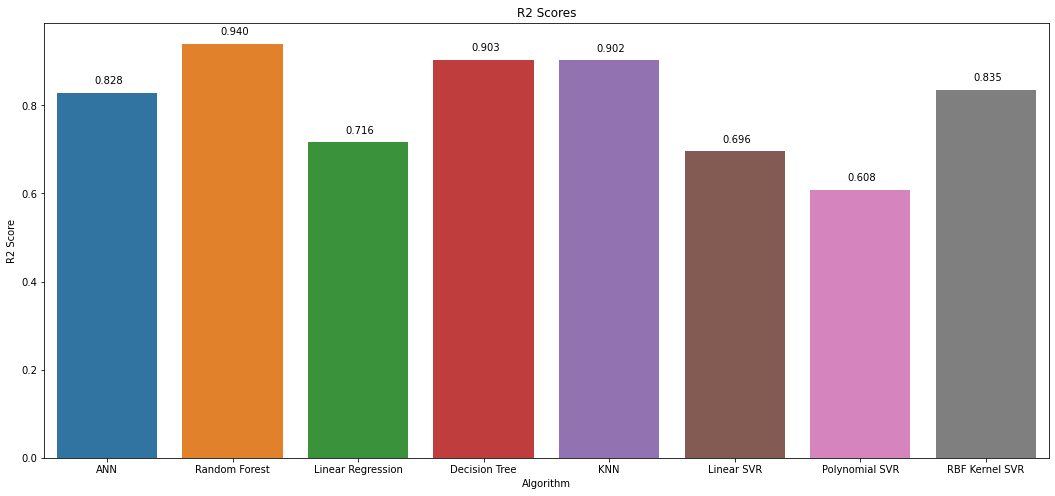

In [12]:
comparision(r2_scores)

#Calculating PAD and Predicted value for Table

In [13]:
prediction_table = pd.concat([
       pd.DataFrame(v, columns=['a', 'b', 'c'], index=np.repeat(k, len(v))) 
       for k, v in predictions.items()
  ]
).rename_axis('algorithm').reset_index()

In [14]:
print(prediction_table.head())

  algorithm         a         b         c
0       ANN  4.050315  4.036478  4.021573
1       ANN  3.386735  3.369190  3.376872
2       ANN  3.596628  3.585618  3.592781
3       ANN  4.072572  4.059391  4.044179
4       ANN  3.715529  3.707968  3.714336


In [15]:
pad = lambda y_true, y_pred: ( np.abs(y_true - y_pred) / y_true) * 100

In [16]:
pads = {}
for algo, y_pred in predictions.items():
    pads[algo] = pad(y_test, y_pred)
    
pad_table = pd.concat([
       pd.DataFrame(v, columns=['a', 'b', 'c'], index=np.repeat(k, len(v))) 
       for k, v in pads.items()
  ]
).rename_axis('algorithm').reset_index()

In [17]:
print(pad_table.head())

  algorithm         a         b         c
0       ANN  1.156716  0.811128  0.438876
1       ANN  2.040824  1.512216  1.743660
2       ANN  5.970174  5.645794  5.856845
3       ANN  0.279818  0.602570  0.975050
4       ANN  1.378702  1.172387  1.346137
